In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
 


In [11]:
from scipy.stats import poisson as P
rate=240/60
rate=rate *1/60 *15
P.pmf(k=0,mu=rate)

0.36787944117144233

Problem Statement and Analysing basic metrics :
getting insight about data and by analysing the type of content movie genres.
 

In [ ]:
data=pd.read_csv("/content/netflix_data.csv")

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


our data consitist more text than no so we need to preprocess it accordingly

In [ ]:
data.shape

(7290, 11)

for now lets apply preprocesing and drop significant null values

In [ ]:
data.drop("director",axis=1,inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   cast          7982 non-null   object
 4   country       7976 non-null   object
 5   date_added    8797 non-null   object
 6   release_year  8807 non-null   int64 
 7   rating        8803 non-null   object
 8   duration      8804 non-null   object
 9   listed_in     8807 non-null   object
 10  description   8807 non-null   object
dtypes: int64(1), object(10)
memory usage: 757.0+ KB


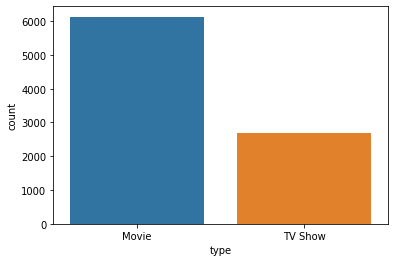

In [ ]:
sns.countplot(x ='type', data = data)

In [ ]:
data.groupby("type").count()

,show_id,title,cast,country,date_added,release_year,rating,duration,listed_in,description
type,,,,,,,,,,
Movie,6131,6131,5656,5691,6131,6131,6129,6128,6131,6131
TV Show,2676,2676,2326,2285,2666,2676,2674,2676,2676,2676


In [ ]:
data.dropna(inplace=True)

**Transforming data for analysis for graphical and non graphical purpose**

```
# This is formatted as code
```



In [ ]:
countries=data["country"].unique()
c1=data["country"].apply(lambda x: str(x).lstrip(" ").split(",")).to_list()
country_df=pd.DataFrame(c1,index=data["show_id"])
country_df=country_df.stack()
country_df=pd.DataFrame(country_df.reset_index())

country_df.rename(columns={0:"countries"},inplace=True)
country_df.drop(['level_1'],axis=1,inplace=True)



In [ ]:


country_df.describe()

,show_id,countries
count,9152,9152
unique,7290,185
top,s1507,United States
freq,8,2839


In [ ]:
country_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9152 entries, 0 to 9151
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   show_id    9152 non-null   object
 1   countries  9152 non-null   object
dtypes: object(2)
memory usage: 143.1+ KB


In [ ]:
country_df.head(10)

,show_id,countries
0,s2,South Africa
1,s5,India
2,s8,United States
3,s8,Ghana
4,s8,Burkina Faso
5,s8,United Kingdom
6,s8,Germany
7,s8,Ethiopia
8,s9,United Kingdom
9,s10,United States


handling ambiguity in country column 

In [ ]:
country_df["countries"]=country_df["countries"].str.strip(" ")
count=country_df["countries"].unique()
print(sorted(count))

['', 'Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bangladesh', 'Belarus', 'Belgium', 'Bermuda', 'Brazil', 'Bulgaria', 'Burkina Faso', 'Cambodia', 'Cameroon', 'Canada', 'Cayman Islands', 'Chile', 'China', 'Colombia', 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic', 'Denmark', 'Dominican Republic', 'East Germany', 'Ecuador', 'Egypt', 'Ethiopia', 'Finland', 'France', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala', 'Hong Kong', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kenya', 'Kuwait', 'Latvia', 'Lebanon', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malawi', 'Malaysia', 'Malta', 'Mauritius', 'Mexico', 'Montenegro', 'Morocco', 'Mozambique', 'Namibia', 'Nepal', 'Netherlands', 'New Zealand', 'Nicaragua', 'Nigeria', 'Norway', 'Pakistan', 'Panama', 'Paraguay', 'Peru', 'Philippines', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar', 'Romania', 'Russia'

**Getting country-wise analytics** 

In [ ]:
data_temp=data[["show_id","type","title","duration"]]
country_df=country_df.merge(data_temp,on="show_id",how="left")

In [ ]:
country_df=country_df[["show_id","countries","type","title"]]

In [ ]:
country_df.drop_duplicates()[(country_df["countries"]=="Nigeria") &(country_df["type"]=="TV Show")]

,show_id,countries,type,title
37,s50,Nigeria,TV Show,Castle and Castle
175,s199,Nigeria,TV Show,King of Boys: The Return of the King
1532,s1655,Nigeria,TV Show,Before 30
2013,s2103,Nigeria,TV Show,Ojos in d' House
2057,s2149,Nigeria,TV Show,The Governor
2841,s2907,Nigeria,TV Show,On the Real
2878,s2939,Nigeria,TV Show,Fifty: The Series
2933,s2993,Nigeria,TV Show,Sons of the Caliphate
3094,s3131,Nigeria,TV Show,"Crazy, Lovely, Cool"


In [ ]:
country_df_10=country_df.groupby(["type","countries"]).count().nlargest(40,columns="show_id").reset_index()

In [ ]:
country_df_10

,type,countries,show_id,title
0,Movie,United States,2492,2492
1,Movie,India,942,942
2,TV Show,United States,782,782
3,Movie,United Kingdom,476,476
4,Movie,Canada,295,295
5,Movie,France,285,285
6,TV Show,United Kingdom,232,232
7,TV Show,Japan,193,193
8,Movie,Germany,168,168
9,TV Show,South Korea,168,168


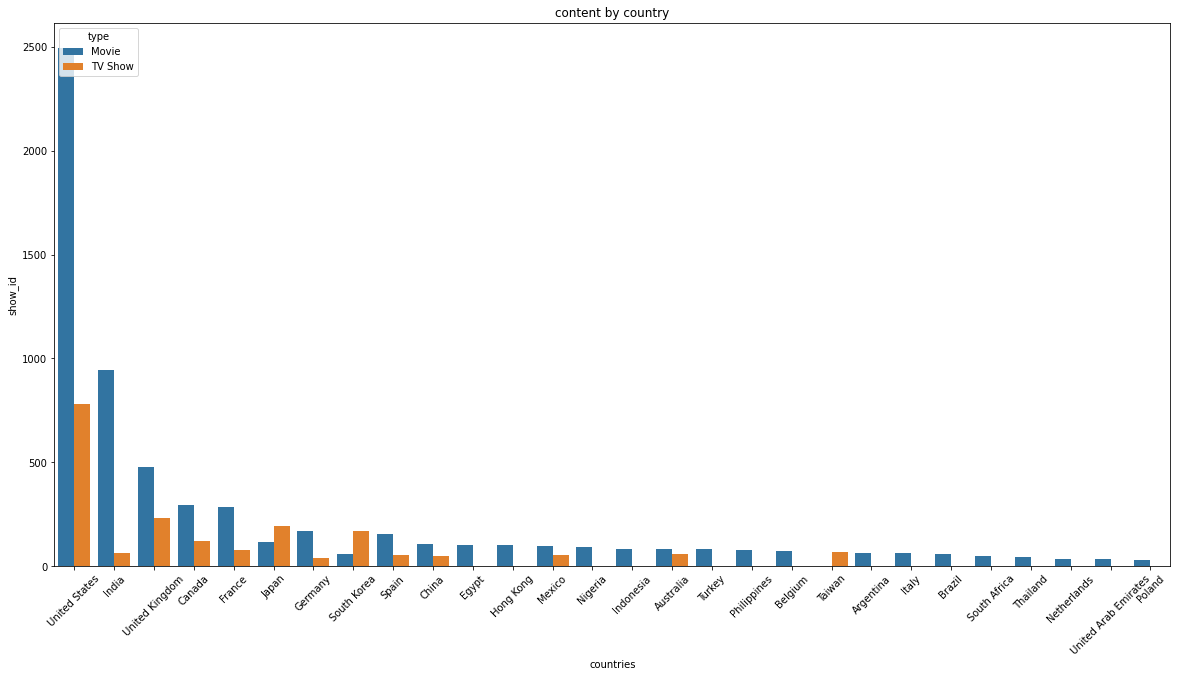

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.barplot(x="countries",y="show_id",data=country_df_10,hue="type",ci=.80)
plt.xticks(rotation=45)
plt.title("content by country")
plt.show()

In [ ]:
data.head()

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
4,s5,TV Show,Kota Factory,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
7,s8,Movie,Sankofa,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


**Genre analysis content**

In [ ]:

g1=data["listed_in"].apply(lambda x: str(x).split(",")).to_list()
genre_df=pd.DataFrame(g1,index=data["show_id"])
genre_df=genre_df.stack()
genre_df=pd.DataFrame(genre_df.reset_index())

genre_df.rename(columns={0:"genre"},inplace=True)
genre_df.drop(['level_1'],axis=1,inplace=True)
print(genre_df.shape)
genre_df.head()

(19323, 2)


,show_id,genre
0,s1,Documentaries
1,s2,International TV Shows
2,s2,TV Dramas
3,s2,TV Mysteries
4,s3,Crime TV Shows


In [ ]:
genre_df=genre_df.merge(data_temp,on="show_id",how="left")
print(genre_df.shape)
genre_df.describe()

(19323, 5)


,duration
count,19320.000000
mean,71.418168
std,52.633318
min,1.000000
25%,2.000000
50%,91.000000
75%,109.000000
max,312.000000


In [ ]:
genre_df_20=genre_df.groupby(["type","genre"]).count().nlargest(20,columns="show_id").reset_index()

In [ ]:
genre_df_20["genre"].to_list()

[' International Movies',
 'Dramas',
 'Comedies',
 'Action & Adventure',
 'Documentaries',
 ' Dramas',
 'International TV Shows',
 ' Independent Movies',
 ' TV Dramas',
 ' Romantic Movies',
 'Children & Family Movies',
 ' International TV Shows',
 ' Thrillers',
 ' Comedies',
 ' TV Comedies',
 'Crime TV Shows',
 "Kids' TV",
 ' Music & Musicals',
 ' Romantic TV Shows',
 'Stand-Up Comedy']

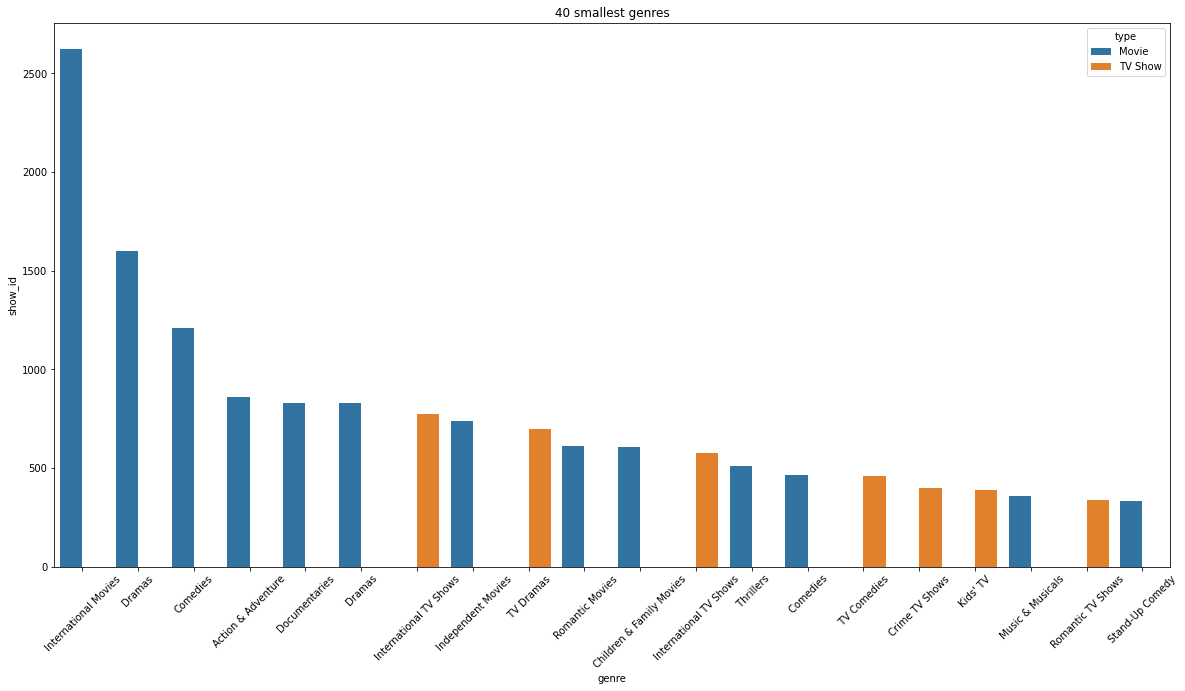

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.barplot(x="genre",y="show_id",data=genre_df_20,hue="type",ci=.80)
plt.xticks(rotation=45)
plt.title("40 smallest genres")
plt.show()

In [ ]:
genre_dfmin_20=genre_df.groupby(["type","genre"]).count().nsmallest(40,columns="show_id").reset_index()

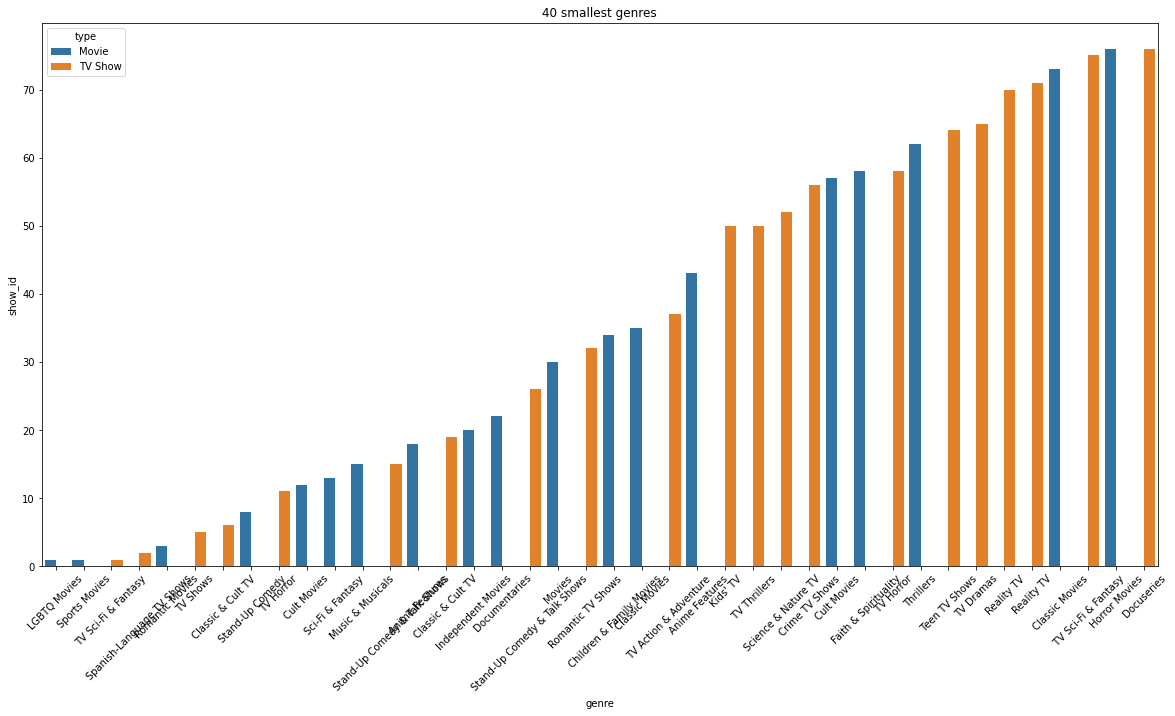

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.barplot(x="genre",y="show_id",data=genre_dfmin_20,hue="type",ci=.80)
plt.xticks(rotation=45)
plt.title("40 smallest genres")
plt.show()

**Cast analysis**

In [ ]:
cast1=data["cast"].apply(lambda x: str(x).split(",")).to_list()
cast_df=pd.DataFrame(cast1,index=data["show_id"])
cast_df=cast_df.stack()
cast_df=pd.DataFrame(cast_df.reset_index())

cast_df.rename(columns={0:"cast"},inplace=True)
cast_df.drop(['level_1'],axis=1,inplace=True)

cast_df.head()

,show_id,cast
0,s2,Ama Qamata
1,s2,Khosi Ngema
2,s2,Gail Mabalane
3,s2,Thabang Molaba
4,s2,Dillon Windvogel


In [ ]:
cast_df=cast_df.merge(data_temp,on="show_id",how="left")


In [ ]:
cast_df

,show_id,cast,type,title
0,s2,Ama Qamata,TV Show,Blood & Water
1,s2,Khosi Ngema,TV Show,Blood & Water
2,s2,Gail Mabalane,TV Show,Blood & Water
3,s2,Thabang Molaba,TV Show,Blood & Water
4,s2,Dillon Windvogel,TV Show,Blood & Water
...,...,...,...,...
59115,s8807,Manish Chaudhary,Movie,Zubaan
59116,s8807,Meghna Malik,Movie,Zubaan
59117,s8807,Malkeet Rauni,Movie,Zubaan
59118,s8807,Anita Shabdish,Movie,Zubaan


# **Actors popular for TV show and movies**


In [ ]:
cast_df_20=cast_df.groupby(["type","cast"]).count().nlargest(110,columns="show_id").reset_index()
print(cast_df_20)

        type               cast  show_id  title
0      Movie        Anupam Kher       38     38
1      Movie            Om Puri       27     27
2      Movie        Boman Irani       25     25
3      Movie       Paresh Rawal       25     25
4      Movie     Shah Rukh Khan       25     25
..       ...                ...      ...    ...
105  TV Show      Mamoru Miyano       11     11
106  TV Show   Nobuhiko Okamoto       11     11
107  TV Show    Takehito Koyasu       11     11
108  TV Show    Tomokazu Sugita       11     11
109    Movie       Alan Cumming       10     10

[110 rows x 4 columns]


In [ ]:
tv_df=cast_df_20[cast_df_20["type"]=="TV Show"]

In [ ]:
movie_df=cast_df_20[cast_df_20["type"]=="Movie"]

In [ ]:
tv_df.shape

(13, 4)

In [ ]:
genre_df_temp=genre_df[["show_id","genre"]]
tv_df=tv_df.join(genre_df_temp,on="show_id",how="left",rsuffix="_r")


In [ ]:
tv_df

,type,cast,show_id,title,show_id_r,genre
6,TV Show,Takahiro Sakurai,22,22,s22,TV Dramas
21,TV Show,Junichi Suwabe,16,16,s16,TV Dramas
22,TV Show,Yuki Kaji,16,16,s16,TV Dramas
25,TV Show,Ai Kayano,15,15,s16,TV Comedies
33,TV Show,Daisuke Ono,14,14,s13,International Movies
34,TV Show,David Attenborough,14,14,s13,International Movies
52,TV Show,Yoshimasa Hosoya,13,13,s13,Dramas
69,TV Show,Kana Hanazawa,12,12,s10,Dramas
70,TV Show,Yuichi Nakamura,12,12,s10,Dramas
105,TV Show,Mamoru Miyano,11,11,s10,Comedies


**Genre and respective cast analysis**

In [ ]:
cast_genre=cast_df.merge(genre_df_temp,on="show_id",how="left")


In [ ]:
cast_genre_type=cast_genre.groupby(["type","genre","cast"]).count()
cast_genre_type=cast_genre_type.reset_index()
#cast_genre_type=cast_genre_type.groupby(["type","genre","cast"]).agg({"show_id":["max"]}).reset_index()

In [ ]:
cast_genre_type=cast_genre_type.sort_values(["genre","show_id"],ascending=[True,False])
cast_genre_type

,type,genre,cast,show_id,title
15,Movie,Anime Features,Chie Nakamura,9,9
237,Movie,Anime Features,Junko Takeuchi,9,9
43,Movie,Anime Features,Houko Kuwashima,8,8
169,Movie,Anime Features,Satsuki Yukino,8,8
226,Movie,Anime Features,Yuki Kaji,8,8
...,...,...,...,...,...
76487,Movie,Thrillers,Theo James,1,1
76488,Movie,Thrillers,Thomas Jane,1,1
76489,Movie,Thrillers,Toby Jones,1,1
76491,Movie,Thrillers,Tommy Lee Jones,1,1


In [ ]:
genre_leaders=cast_genre_type.drop_duplicates(["type","genre"],keep="first")
genre_leaders.reset_index()

,index,type,genre,cast,show_id,title
0,15,Movie,Anime Features,Chie Nakamura,9,9
1,393,Movie,Children & Family Movies,Koichi Yamadera,4,4
2,76493,TV Show,Classic & Cult TV,Arnold Ridley,1,1
3,867,Movie,Classic Movies,Harrison Ford,4,4
4,1133,Movie,Comedies,Asrani,7,7
...,...,...,...,...,...,...
68,112433,TV Show,TV Dramas,Barbara Garrick,2,2
69,113092,TV Show,TV Horror,Aaron Abrams,1,1
70,113272,TV Show,TV Sci-Fi & Fantasy,Alex Mallari Jr.,1,1
71,113279,TV Show,TV Shows,Abeer Alotaibi,1,1


**Genre Leaders**


In [ ]:
genre_leaders.nlargest(40,columns="show_id")

,type,genre,cast,show_id,title
18151,Movie,International Movies,Anupam Kher,33,33
99013,TV Show,Anime Series,Takahiro Sakurai,21,21
79945,TV Show,International TV Shows,Takahiro Sakurai,19,19
5293,Movie,Dramas,Anupam Kher,14,14
53945,Movie,Comedies,Anupam Kher,14,14
77135,TV Show,Docuseries,David Attenborough,13,13
100320,TV Show,British TV Shows,David Attenborough,13,13
43623,Movie,Action & Adventure,Anupam Kher,11,11
50210,Movie,Children & Family Movies,Erin Fitzgerald,11,11
62115,Movie,Documentaries,Samuel West,10,10


In [ ]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis NiewÃ¶hner, Milan Peschel,...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...


In [ ]:
genre_df.groupby("type").agg({"duration":["mean","min","max"]})


duration            
               mean  min    max
type                           
Movie    106.156731  8.0  253.0
TV Show    1.929155  1.0   15.0

In [ ]:
data['duration']=data['duration'].str.strip("minSeasons")
data['duration']=data['duration'].astype("float")

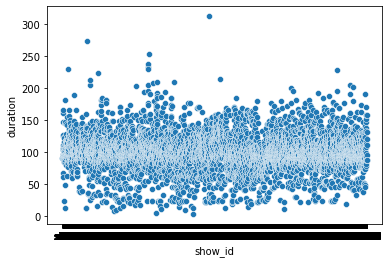

In [ ]:
sns.scatterplot(x=data['show_id'],y=data[data["type"]=="Movie"]['duration'])

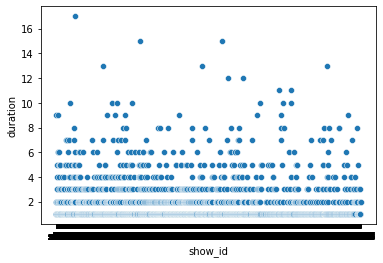

In [ ]:
sns.scatterplot(x=data['show_id'],y=data[data["type"]=="TV Show"]['duration'])


##**Summary**<br>
Starting with data type most of content as string and require preprocessing there is lot of missing data for tvshows .<br>

1.Data consists of sevral nan as well as contains strings in ambigous format we have preprocessed it.<br>

2.Duration of consist of of outliers and may be some wrong data as  movie duration lies from ***8min to 253 min*** with average time **106min** and for TV shows are ranging from **1 to 15** season.<br>
3.Countries having top content according to frequency<br> 
<section>
0)	Movie-	United States	
1)	Movie-	India	
2)	TV Show-	United States	
3)	Movie-	United Kingdom	
4)	Movie-	Canada	
5)	Movie-	France	
6)	TV Show-	United Kingdom	
7)	TV Show-	Japan	
8)	Movie-	Germany	
9)	TV Show-	South Korea	
10)	Movie-	Spain<br>
countries like USA and india got decent amount of content.
</section>
<br>
4.Top 20 genres are like :<br>
' International Movies',
 'Dramas',
 'Comedies',
 'Action & Adventure',
 'Documentaries',
 ' Dramas',
 'International TV Shows',
 ' Independent Movies',
 ' TV Dramas',
 ' Romantic Movies',
 'Children & Family Movies',
 ' International TV Shows',
 ' Thrillers',
 ' Comedies',
 ' TV Comedies',
 'Crime TV Shows',
 "Kids' TV",
 ' Music & Musicals',
 ' Romantic TV Shows',
 'Stand-Up Comedy'
 <br>
 content around comedy is in different niches like ' Comedies',
 ' TV Comedies','Stand-Up Comedy'.
 

## Actionable insights 
1.More niche content for high per capita income countries like japan for anime could help in increase in revenue
<br>

2.Horror category needs more innovation interms of content qauntity as well as quality.
<br>

3.Genres in kids space needs more content as they this demogrphic could be a good influencer for customer base.

4.we should use events with genre leader to promote content and genre leader could be found in above tabel
<br>

5.short form of scifi(60 min to 180 min) content is lacking documentries could help 